In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [19]:
# STEP 1: Load the Dataset
# ------------------------
# Load the dataset into a pandas DataFrame and inspect its structure.
file_path = '/content/hahackathon_dev.csv'
dataset = pd.read_csv(file_path)

In [20]:
# Display dataset information
print("Dataset Overview:")
print(dataset.info())
print("\nFirst few rows:")
print(dataset.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None

First few rows:
     id                                               text
0  8001  What's the difference between a Bernie Sanders...
1  8002     Vodka, whisky, tequila. I'm calling the shots.
2  8003     French people don't masturbate They Jacque off
3  8004  A lot of Suicide bombers are Muslims - I don't...
4  8005  What happens when you fingerbang a gypsy on he...


In [21]:
# Check for missing values and duplicates
dataset = dataset.dropna()  # Drop rows with missing values
dataset = dataset.drop_duplicates()  # Remove duplicate rows

In [22]:
# Let's display the first few rows to see what we have
print(dataset.head())

     id                                               text
0  8001  What's the difference between a Bernie Sanders...
1  8002     Vodka, whisky, tequila. I'm calling the shots.
2  8003     French people don't masturbate They Jacque off
3  8004  A lot of Suicide bombers are Muslims - I don't...
4  8005  What happens when you fingerbang a gypsy on he...


In [23]:
# Assuming we manually label a subset of the data for humor and offense (simulated labels here)
# You would replace these simulated labels with your actual labeled data

# Manually label a small portion of the dataset for demonstration purposes
labeled_data = {
    'text': [
        "This is a funny joke!",
        "A serious article about politics.",
        "This is an offensive comment about a group of people."
    ],
    'humor_label': [1, 0, 0],  # 1 = humorous, 0 = non-humorous
    'offense_label': [0, 0, 1]  # 1 = offensive, 0 = non-offensive
}

labeled_df = pd.DataFrame(labeled_data)

# Vectorizing the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(labeled_df['text'])

# Labels for humor and offense
y_humor = labeled_df['humor_label']
y_offense = labeled_df['offense_label']

In [24]:
# Train-test split (using the labeled data for now)
X_train, X_test, y_train_humor, y_test_humor = train_test_split(X, y_humor, test_size=0.3, random_state=42)
X_train_offense, X_test_offense, y_train_offense, y_test_offense = train_test_split(X, y_offense, test_size=0.3, random_state=42)

In [25]:
# Train a Random Forest classifier for humor detection
humor_model = RandomForestClassifier(n_estimators=100, random_state=42)
humor_model.fit(X_train, y_train_humor)

RandomForestClassifier(random_state=42)

In [26]:
# Train a Random Forest classifier for offense detection
offense_model = RandomForestClassifier(n_estimators=100, random_state=42)
offense_model.fit(X_train_offense, y_train_offense)


RandomForestClassifier(random_state=42)

In [27]:
# Predict on the test set
y_pred_humor = humor_model.predict(X_test)
y_pred_offense = offense_model.predict(X_test_offense)

In [28]:
# Evaluate the model for humor detection
print("\nHumor Detection Classification Report:")
print(classification_report(y_test_humor, y_pred_humor))


Humor Detection Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [29]:
# Evaluate the model for offense detection
print("\nOffense Detection Classification Report:")
print(classification_report(y_test_offense, y_pred_offense))


Offense Detection Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



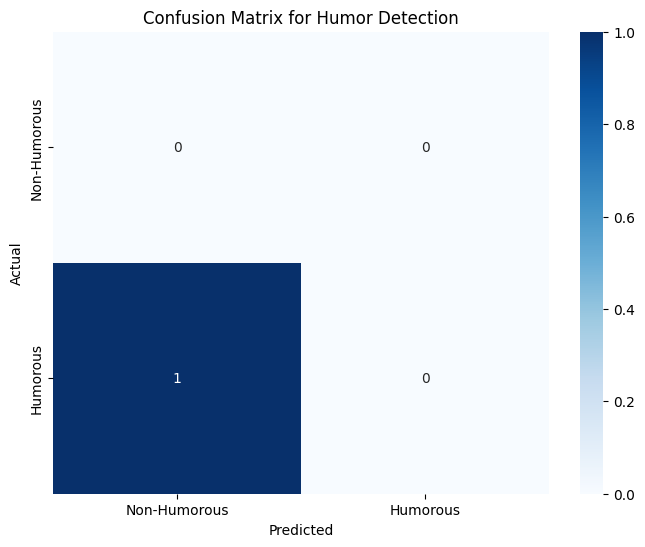

In [32]:
# Visualize the classification results for humor detection
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_humor, y_pred_humor), annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Humorous", "Humorous"], yticklabels=["Non-Humorous", "Humorous"])
plt.title("Confusion Matrix for Humor Detection")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


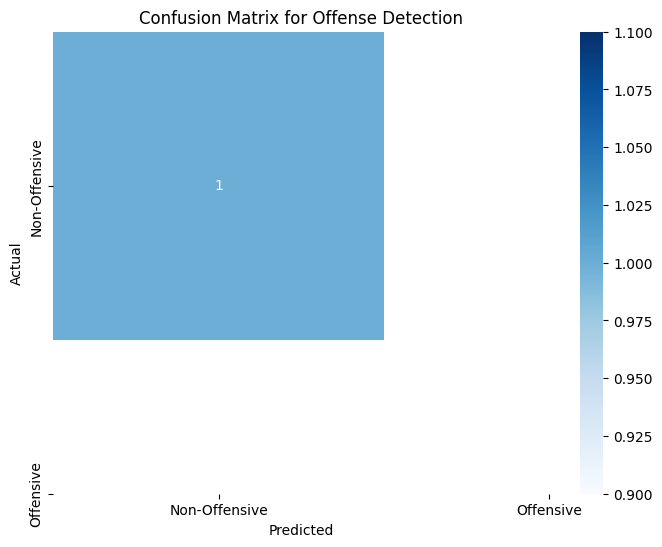

In [33]:
# Visualize the classification results for offense detection
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_offense, y_pred_offense), annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Offensive", "Offensive"], yticklabels=["Non-Offensive", "Offensive"])
plt.title("Confusion Matrix for Offense Detection")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
# If you want to apply the model to your entire dataset (for predictions)
# Uncomment the following to predict labels for the unlabeled dataset
X_unlabeled = vectorizer.transform(dataset['text'])
humor_predictions = humor_model.predict(X_unlabeled)
offense_predictions = offense_model.predict(X_unlabeled)

dataset['predicted_humor'] = humor_predictions
dataset['predicted_offense'] = offense_predictions
print(dataset[['id', 'text', 'predicted_humor', 'predicted_offense']].head())

     id                                               text  predicted_humor  \
0  8001  What's the difference between a Bernie Sanders...                0   
1  8002     Vodka, whisky, tequila. I'm calling the shots.                0   
2  8003     French people don't masturbate They Jacque off                0   
3  8004  A lot of Suicide bombers are Muslims - I don't...                0   
4  8005  What happens when you fingerbang a gypsy on he...                0   

   predicted_offense  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
